## Definindo o problema de negócio

Nosso objetivo é o de prever o preço de um carro com base as observações já existentes. As variáveis já existentes incluem fatores como número de portas do carro, localização do motor (frente/atrás), tipo de combústivel e outros.

## Definindo o Dataset
Conforme dito, o dataset consiste de um conjunto de observações relativamente aos carros já vendidos. Neste dataset temos mais de 29 colunas, logo iremos destacar apenas ás que aparentam ser mais significativas. 

In [ ]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("automobileEDA.CSV")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2>1 - Análise exploratória dos dados usando visualização </h2> 

<p> Esta fase tem como principal objectivo identificar as príncipais variáveis para efectuar previsões do preço do carro </p>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<p> Visualizando tipo de dados para escolher melhor forma de visualização: </p>

In [10]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<p> Cálculo da correlação entre as variáveis to tipo "int64" ou "float64" usando o método "corr": </p>

<h2> 1.2  - Variáveis númericas contínuas: </h2>
<p>Variáveis numéricas contínuas são variáveis que podem conter qualquer valor dentro de algum intervalo. Eles podem ser do tipo "int64" ou "float64". Uma ótima maneira de visualizar essas variáveis é usando gráficos de dispersão com linhas ajustadas.</p>

Vamos encontrar o gráfico de dispersão entre "engine-size" e "price".

(0.0, 53241.220875802595)

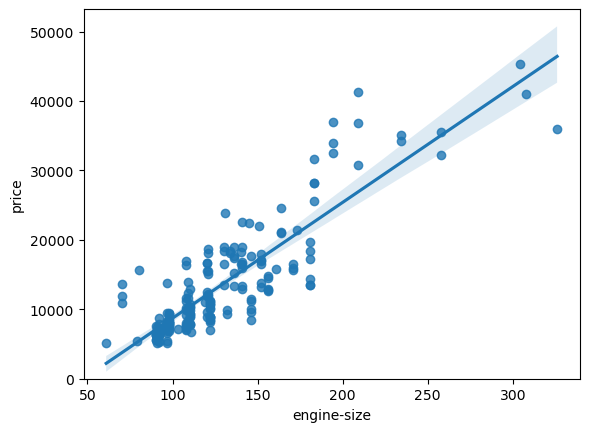

In [12]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p> É possível verificar que a medida que o tamanho do motor (engine-size) aumenta, o preço do carro(price) também aumenta: isso indica 
    uma correlação direta positiva entre essas duas variáveis. Logo o tamanho do motor(engine-size) parece ser um bom indicador
    de preço visto que a linha de regressão é quase uma diagonal perfeita. </p>

Podemos examinar a correlação entre 'tamanho do motor' e 'preço' e ver que é aproximadamente 0,87:
    

In [14]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


"Highway-mpg" é uma variável potencial para prever o  preço. Vamos encontrar o gráfico de dispersão de "highway-mpg" e "price". 

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

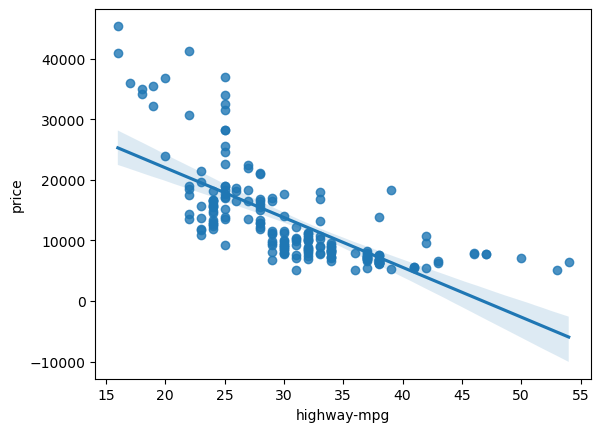

In [15]:
sns.regplot(x="highway-mpg", y="price", data=df)

A medida que o valor de highway-mpg cresce, o preço diminui: isso indica uma relação inversa negativa  entre essas duas variáveis. Highway-mpg tem o potencial de ser uma variável para prever o preço.

<h3> Relação linear fraca </h3>

É possível verificar uma relação linear fraca entre a variável "peak-rpm" e "price":
    

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

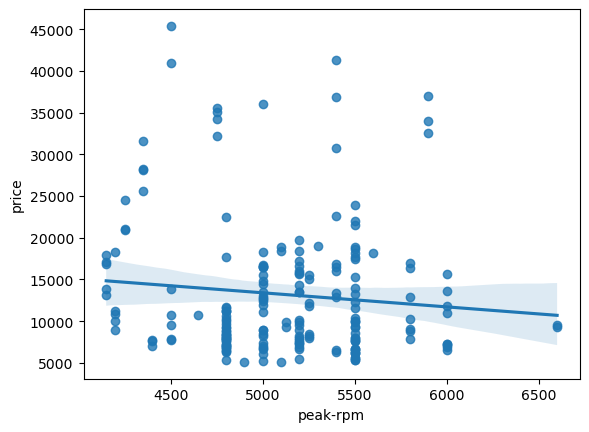

In [17]:
sns.regplot(x="peak-rpm", y="price", data=df)

Como podemos notar a variável peak-rpm não parece ser um bom indicador pois a linha de regressão está próxima da horizontal 
o que não indica nenhum tipo de relação. Além disso, os pontos de dados estão muito dispersos e distantes da linha ajustada, mostrando muita variabilidade. Portanto, não é uma variável confiável

Podemos examinar a correlação entre 'peak-rpm' e 'price' e ver que é aproximadamente -0,101616:

In [19]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h2> 1.3 Variáveis categóricas </h2>
<p> São variáveis que descrevem uma caracterísitca única de uma unidade de dados. As variáveis categóricas podem ser do tipo 
"object" ou "int64". Uma boa maneira de visualizar variáveis categóricas é usando boxplots. </p>

Vejamos a relação entre "body-style" e "price".

<AxesSubplot:xlabel='body-style', ylabel='price'>

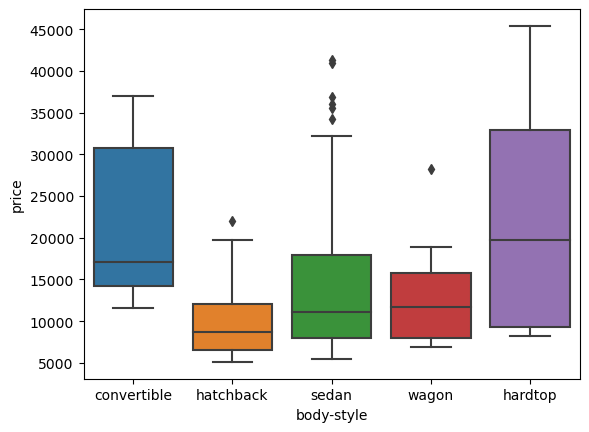

In [23]:
sns.boxplot(x="body-style", y="price", data=df)

<p> É possível verificar que não existe nenhum padrão de distribuição entre a variável "price" e a variável "body-style", ou seja
é possível notar uma distribuição aleatória. Logo a variável "body-style" não é útil para efectuar previsão. </p>

<p> Vamos examinar uma relação entre a variável "engine-location" e "price" </p> 

<AxesSubplot:xlabel='engine-location', ylabel='price'>

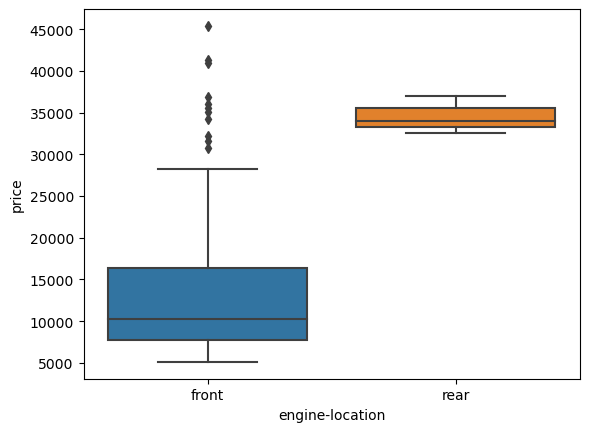

In [26]:
sns.boxplot(x="engine-location", y = "price", data=df)

<p>Aqui vemos que a distribuição de preço entre essas duas categorias de localização do motor (engine-location), dianteira e traseira, é distinta o suficiente para considerar a localização do motor como um bom indicador potencial de preço.</p>

Vamos examinar a relação entre "drive-wheels" e "price":

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

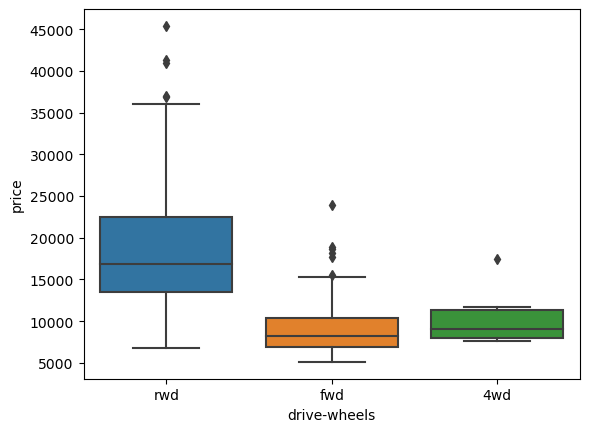

In [28]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p> Aqui vemos que a distribuição de preços entre as diferentes categorias de rodas apresenta uma informação que nos possibilita
de verificar uma diferença entre elas. Como tal, a variável "drive-wheels" pode vir a ser um preditor de preço.</p>

<h2> 2 - Correlação e causação </h2>

<p> <b> Correlação: </b> Correlação é uma forma de medir a interpendência entre duas variáveis  </p>
<p> <b> Causação: </b> é a relação entre causa e efeito entre duas variáveis </p>

<p><b>Correlação de Pearson</b></p>
<p>A Correlação de Pearson mede a dependência linear entre duas variáveis X e Y.</p>
<p>O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:</p>
<ul>
     <li><b>1</b>: Correlação linear positiva perfeita.</li>
     <li><b>0</b>: Sem correlação linear, as duas variáveis provavelmente não afetam uma à outra.</li>
     <li><b>-1</b>: Correlação linear negativa perfeita.</li>
</ul>

<p>A correlação de Pearson é o método padrão da função "corr". Como antes, podemos calcular a correlação de Pearson das variáveis 'int64' ou 'float64'.</p>

In [11]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<b>Valor P</b>

<p>O que é esse valor P? O valor P é o valor da probabilidade de que a correlação entre essas duas variáveis seja estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0.05, o que significa que temos 95% de confiança de que a correlação entre as variáveis é significativa.</p>

Por convenção, quando o

<ul>
     <li>p-valor é $<$ 0,001: dizemos que há fortes evidências de que a correlação é significativa.</li>
     <li>o valor-p é $<$ 0,05: há evidência moderada de que a correlação é significativa.</li>
     <li>o valor-p é $<$ 0,1: há evidências fracas de que a correlação é significativa.</li>
     <li>o valor-p é $>$ 0,1: não há evidências de que a correlação seja significativa.</li>
</ul>

<h2> 2.1 - Cálculo de correlação entre certas variáveis com a variável de previsão preço </h2>

In [35]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>


Vamos calcular a correlação e o Valor P entre a variável Wheel-Base e Price:

In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("O coeficiente de correlação de pearson é ", pearson_coef, "com um valor de p de :", p_value)

O coeficiente de correlação de pearson é  0.584641822265508 com um valor de: 8.076488270733218e-20


<h4>Conclusão:</h4>
<p>Como o valor-p é $<$ 0,001, a correlação entre "wheel-base" e "price" é estatisticamente significativa, embora a relação linear não seja extremamente forte (~0,585).</p>

<h3>Horsepower vs. Price</h3>


Vamos calcular o Coeficiente de Correlação de Pearson e o valor-P de 'horsepower' e 'price'.

In [43]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("O coeficiente de correlação de pearson é:", pearson_coef, "com um valor de p de :", p_value)

O coeficiente de correlação de pearson é: 0.809574567003656 com um valor de p de : 6.369057428259557e-48


<h4>Conclusão:</h4>

<p>Como o valor-p é $<$ 0,001, a correlação entre "horsepower" e "price" é estatisticamente significativa e a relação linear é bastante forte (~0,809, próximo de 1).</p>

<h2>Conclusão: variáveis importantes</h2>

<p>Agora temos uma ideia melhor de como são nossos dados e quais variáveis são importantes a serem consideradas ao prever o preço do carro. Reduzimos para as seguintes variáveis:</p>

Variáveis numéricas contínuas:

<ul>
     <li>Length</li>
     <li>Width</li>
     <li>Curb-weight</li>
     <li>Engine-size</li>
     <li>Horse-power</li>
     <li>City-mpg</li>
     <li>Highway-mpg</li>
     <li>Wheel-base</li>
     <li>Bore</li>
</ul>

Variáveis ​​categóricas:

<ul>
     <li>Drive-wheels</li>
</ul>

<p>À medida que avançamos para a construção de modelos de aprendizado de máquina para automatizar nossa análise, alimentar o modelo com variáveis que afetam significativamente nossa variável de destino melhorará o desempenho de previsão de nosso modelo.</p>

<h1> 3 - Modelo de regressão Linear </h1>

<p>Um exemplo de modelo de dados que usaremos é:</p>
<b>Regressão linear simples</b>

<br>
<p>A Regressão Linear Simples é um método para nos ajudar a entender a relação entre duas variáveis:</p>
<ul>
     <li>O preditor/variável independente (X)</li>
     <li>A resposta/variável dependente (que queremos prever)(Y)</li>
</ul>

<p>O resultado da regressão linear é uma <b>função linear</b> que prevê a variável de resposta (dependente) como uma função da variável de previsão (independente).</p>

$$
Y: Resposta \ Variavel\\\\\\\\\\
X: Preditor \ Variaveis
$$


<b>Função Linear</b>
$$
Yhat = a + b  X
$$


<ul>
     <li>a refere-se ao <b>intercepto</b> da linha de regressão, ou seja: o valor de Y quando X é 0</li>
     <li>b refere-se à <b>inclinação</b> da linha de regressão, ou seja: o valor com o qual Y muda quando X aumenta em 1 unidade</li>
</ul>

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
lm 

LinearRegression()

<h4>Como "highway-mpg" pode nos ajudar a prever o preço do carro?</h4>

Para este exemplo, queremos ver como a variável "highway-mpg" pode nos ajudar a prever o preço do carro.
Usando a regressão linear simples, criaremos uma função linear com "highway-mpg" como a variável de previsão e o "preço" como a variável de resposta.

In [53]:
X = df[['highway-mpg']]
Y = df['price']

Ajustamos o modelo linear usando o Highway-mpg:

In [54]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:

In [55]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Qual é o valor da interceptação (a)?</h4>

In [56]:
lm.intercept_

38423.3058581574

<h4>Qual é o valor da inclinação (b)?</h4>


In [57]:
lm.coef_

array([-821.73337832])

<h3>Qual é o modelo linear estimado final que obtemos?</h3>

Como vimos acima, devemos obter um modelo linear final com a estrutura:

$$
Yhat = a + b  X
$$

Conectando os valores reais, obtemos:

<b>Price</b> = 38423.31 - 821.73 x <b>highway-mpg</b>
